In [5]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

## Задание №1

In [7]:
data1 = pd.read_csv('transactions.csv')

In [3]:
data1.head()

,Unnamed: 0,CONTRACTOR,STATUS,SUM
0,0,"Acme, Inc",WAITING,415
1,1,"Umbrella, Inc",WAITING,646
2,2,"Umbrella, Inc",OK,780
3,3,"Umbrella, Inc",CANCELED,887
4,4,"Umbrella, Inc",OK,255


In [9]:
print('Three first biggest active sums:')
print(data1[data1['STATUS'] == 'OK']['SUM'].sort_values(ascending = False)[0:3])

Three first biggest active sums:
5085    100500
4451      1000
8186       999
Name: SUM, dtype: int64


In [10]:
print('Full sum:', data1[(data1.STATUS == 'OK') & (data1.CONTRACTOR =='Umbrella, Inc')]['SUM'].sum())

Full sum: 925719


## Задание №2

In [11]:
data2 = pd.read_csv('flights.csv')

In [12]:
data2.head()

,Unnamed: 0,CARGO,PRICE,WEIGHT
0,0,Nimble,1540,16
1,1,Nimble,1635,20
2,2,Nimble,1592,15
3,3,Nimble,1173,10
4,4,Nimble,1909,11


<AxesSubplot:title={'center':'Number of flights'}, xlabel='CARGO'>

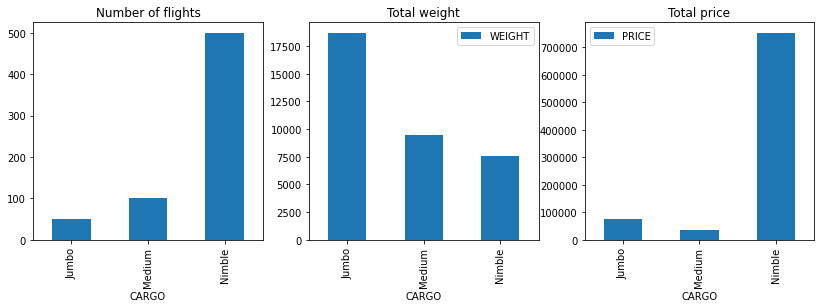

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (14,4))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
flights = data2.groupby('CARGO').size()
weight = data2[['CARGO', 'WEIGHT']].groupby(['CARGO']).sum()
price = data2[['CARGO', 'PRICE']].groupby(['CARGO']).sum()
weight.plot(kind='bar', title='Total weight',ax = axes[1])
price.plot(kind='bar', title='Total price',ax = axes[2])
flights.plot(kind='bar', title='Number of flights', ax = axes[0], legend = False)

## Задание №3

In [39]:
students = pd.read_excel('students_info.xlsx')

In [30]:
students.head()

,login,group_faculty,group_out
0,r0300101,1,35
1,r0300102,1,32
2,r0300103,1,32
3,r0300104,1,32
4,r0300105,1,32


In [40]:
ejudge = pd.read_html('results_ejudge.html')[0]

In [32]:
ejudge.head()

,Place,User,A,B,C,D,E,F,G,H,Solved,Score
0,1,r0300205,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187
1,2,r0300206,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182
2,3,r0300508,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139
3,4,r0300314,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137
4,5,r0300209,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132


In [41]:
data = ejudge.merge(students, left_on='User', right_on='login')


In [42]:
data = data.drop(columns = ['login'])
data.head()

,Place,User,A,B,C,D,E,F,G,H,Solved,Score,group_faculty,group_out
0,1,r0300205,9.0,10.0,19.0,20.0,20.0,30.0,30.0,49.0,8,187,2,33
1,2,r0300206,10.0,3.0,20.0,20.0,20.0,30.0,30.0,49.0,7,182,2,33
2,3,r0300508,10.0,10.0,20.0,20.0,20.0,30.0,29.0,NaN,7,139,5,33
3,4,r0300314,9.0,9.0,20.0,20.0,20.0,30.0,9.0,20.0,6,137,3,33
4,5,r0300209,8.0,10.0,14.0,20.0,20.0,30.0,0.0,30.0,5,132,2,33


<AxesSubplot:xlabel='group_out'>

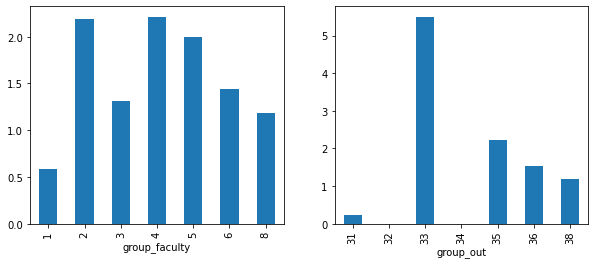

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
group = data[['group_faculty', 'Solved']].groupby(['group_faculty']).mean()
group_info = data[['group_out', 'Solved']].groupby(['group_out']).mean()
group.plot(kind='bar', legend = False, ax = axes[0])
group_info.plot(kind='bar', legend=False, ax = axes[1])

In [53]:
gh = data[(data['G']>=10) | (data['H']>=10)][['User', 'group_out', 'group_faculty']]

In [61]:
gh.head()
print(gh.shape)

(12, 3)


<AxesSubplot:title={'center':'Where from'}, xlabel='group_out'>

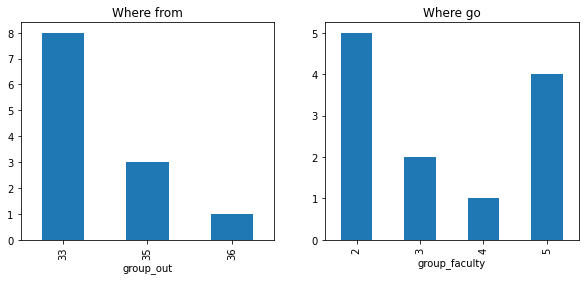

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
gh.groupby(['group_faculty']).size().plot(kind='bar',ax = axes[1], title = 'Where go')
gh.groupby(['group_out']).size().plot(kind='bar', ax = axes[0], title='Where from')